In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_utils import *
from sigproc_kit import *
import random
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

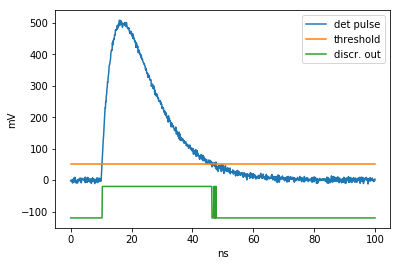

t1 : 10.316 ns, tot : 36.096 ns


In [2]:
##################################################
##             basic discriminator              ##
##################################################

t = np.linspace(0,100e-9,1000) # be sure to make not to few steps, if you have a sharp IR

Q = 200e-12
tau1 = 5e-9
tau2 = 10e-9
delay = 10e-9

det = detector_signal_function(t, Q, tau1, tau2, delay)

noise = 5e-3


hyst = 5e-3

y = det + noise*np.random.normal(size=len(t))

thresh = 50e-3

discr, t1, tot = discriminate(t,y,thresh,hysteresis=hyst)

plt.plot(t*1e9,y*1e3,label="det pulse")
plt.plot(t*1e9,y*0+thresh*1e3,label="threshold")
plt.plot(t*1e9,discr*100-120,label="discr. out")
plt.xlabel("ns")
plt.ylabel("mV")
plt.legend()
plt.show()

print("t1 : {:3.3f} ns, tot : {:3.3f} ns".format(t1*1e9,tot*1e9))

$$f(t) = \frac{1}{\tau_1-\tau_2}\cdot \left(e^{-\frac{t}{\tau_1}} - e^{-\frac{t}{\tau_2}}\right)$$


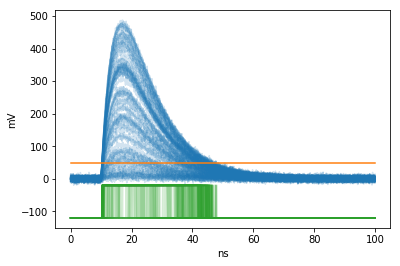

In [3]:
t1_list  = []
tot_list = []

for i in range(0,1000):

  y = random.random()*det + noise*np.random.normal(size=len(t))
  discr, t1, tot = discriminate(t,y,thresh,hysteresis=hyst)
  t1_list  += [t1]
  tot_list += [tot]
  if (i < 80):
    alpha = 0.2
    plt.plot(t*1e9,y*1e3,label="det pulse",color=colors[0],alpha=alpha)
    plt.plot(t*1e9,discr*100-120,label="discr. out",color=colors[2],alpha=alpha)
    
plt.plot(t*1e9,y*0+thresh*1e3,label="threshold",color=colors[1])
plt.xlabel("ns")
plt.ylabel("mV")
plt.show()
    
t1 = np.array(t1_list)
tot = np.array(tot_list)

Text(0,0.5,'tot (ns)')

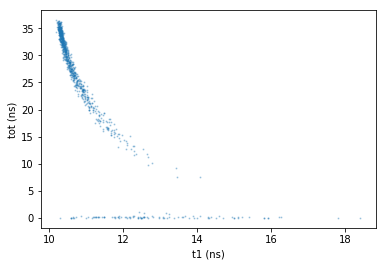

In [4]:
plt.scatter(t1*1e9,tot*1e9, s=1, alpha=0.3)
plt.xlabel("t1 (ns)")
plt.ylabel("tot (ns)")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


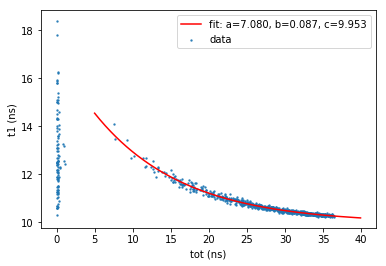

In [5]:

def t1_walk(x, a,b,c):
    return a*np.exp(-b*(x))+c


xdata = tot*1e9
ydata = t1*1e9

mask = ~np.isnan(xdata) & ~np.isnan(ydata) & (xdata >5)
xdata = xdata[mask]
ydata = ydata[mask]

plot_x = np.arange(5,40,0.1)

popt, pcov = curve_fit(t1_walk, xdata, ydata, p0 = [1,1,1])

plt.plot(plot_x, t1_walk(plot_x, *popt), 'r-',         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.scatter(tot*1e9,t1*1e9, s=2, alpha=0.8,label="data")
plt.ylabel("t1 (ns)")
plt.xlabel("tot (ns)")
plt.legend()
plt.show()


$$ walk(tot) = a\cdot e^{-b\cdot tot}+c $$

In [6]:
#end